[original code](https://github.com/JuliaDynamics/JuliaDynamics/blob/master/tutorials/Youtube_JuliaLang_tutorial/1.%20DynamicalSystemsBase.ipynb)                     

[Youtube tutorial](https://www.youtube.com/watch?v=A8g9rdEfdNg)

# DynamicalSystemsBase

A. Creating an instance of a dynamical systems

B. Getting a trajectory out of it

C. Jacobian function

D. Identical handling for continuous and discrete systems

# A. Creating an instance of a dynamical systems

## What is a dynamical system ?

Dynamical systems is a rule a that defines how some variable  $u$  evolves in time. The law is described by the equations of motion in function $f$.

There are two types of dynamical systems:
1. **Maps**: The time here is  descrete. The equation of motion looks like $$ u_{n+1} = f(u_{n}, p, t) $$ 


2. **ODE**: Ordinary differential equations where the time is continuous. The equation of motion looks like this 
   $$\frac{du}{dt} = f(u_{n}, p, t)$$
   
   where $p$ is the parameter os the system. $u$ is the state of the system, for example $(x,y,z)$ or $(\theta, I)$ etc.

## Creating a simple discrete system

A `DynamicalSystem` in julia is a `struct` that has all the information of a dynamical system:
1. Equation of motionfinction, $f$
2. Initial state
3. Parameter container 
4. constructor for `Dynamicalsystem`

In [4]:
using DynamicalSystems, Plots

### 1. Equations of motion (eom) **[Henon map](https://en.wikipedia.org/wiki/H%C3%A9non_map)**

Here we will focus on an initial example of Henon map

$$x_{n+1} = 1 - a x_{n}^2 + y_{n}$$
$$y_{n+1} = b x_{n}$$

we can define this equations into Julia function. We have two options in Julia to define a function, **oop**(out of place) or **iip**(inplace)

In [5]:
henon_eom(x, p, t) = SVector{2}(1.0-p[1]*x[1]^2 + x[2], p[2]*x[1])       # out of place method

henon_eom (generic function with 1 method)

remember that `p` and `t` *must* be included in the equations of the motion, irrespective of weather they are used or not

### 2. Inital state

The second argument for the DiscreteDynamicalSystem constructor is a state, which represents the initial condition for the system:

In [6]:
state = zeros(2)

2-element Array{Float64,1}:
 0.0
 0.0

### 3. Parameters of the EOM

 p, is simply a parameter container. It is best to use a mutable container that can be accessed with brackets (getindex).

In [7]:
p = [1.4, 0.3]

2-element Array{Float64,1}:
 1.4
 0.3

### 4. constructor for `DynamicalSystem`

now these three arguments are enough to create a constructor for  `Dynamicalsystem`

In [8]:
henon = DiscreteDynamicalSystem(henon_eom, state, p)

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      henon_eom
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.4, 0.3]

# B. Getting a trajectory 

Now that we have created the system, the first (and most basic) thing to do is to simply plot its time evolution and see what it looks like. the `trajectory` function is a tool that evolves the system and returns the output at ***equally spaced*** time intervals

In [9]:
# trajectory from inital condition
tr = trajectory(henon, 100000) # give me the trajectory of henonmap, by evolving it for 100000 times 

2-dimensional Dataset{Float64} with 100001 points
  0.0        0.0
  1.0        0.0
 -0.4        0.3
  1.076     -0.12
 -0.740886   0.3228
  0.554322  -0.222266
  0.347552   0.166297
  0.997188   0.104265
 -0.287871   0.299156
  1.18314   -0.0863614
 -1.0461     0.354942
 -0.177128  -0.313831
  0.642244  -0.0531385
  ⋮         
  0.582553   0.103
  0.627885   0.174766
  0.622831   0.188365
  0.64528    0.186849
  0.603908   0.193584
  0.682997   0.181173
  0.528095   0.204899
  0.814462   0.158428
  0.229742   0.244338
  1.17044    0.0689225
 -0.848995   0.351133
  0.342024  -0.254698

`trajectory` returns a dataset which is a wrapper of `vector{SVector} that can be accessed like a matrix. 

we can also start from a different point also

In [10]:
inital_condition2 = 0.01*rand(2)

2-element Array{Float64,1}:
 0.0044135750220182365
 0.008379143949571082

In [11]:
tr2 = trajectory(henon, 100000, inital_condition2)

2-dimensional Dataset{Float64} with 100001 points
  0.00441358   0.00837914
  1.00835      0.00132407
 -0.422159     0.302506
  1.053       -0.126648
 -0.678981     0.3159
  0.670479    -0.203694
  0.166947     0.201144
  1.16212      0.0500842
 -0.84066      0.348637
  0.359244    -0.252198
  0.567123     0.107773
  0.657493     0.170137
  0.564921     0.197248
  ⋮           
  0.490253     0.164297
  0.827809     0.147076
  0.1877       0.248343
  1.19902      0.05631
 -0.956395     0.359706
  0.079138    -0.286918
  0.704314     0.0237414
  0.329261     0.211294
  1.05952      0.0987782
 -0.472827     0.317855
  1.00486     -0.141848
 -0.5555       0.301459

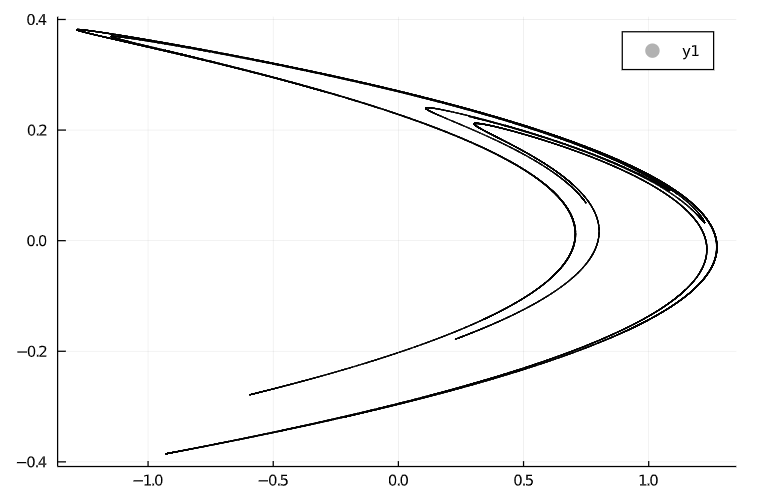

# C. Jacobian Function

## What is Jacobian of a function ?

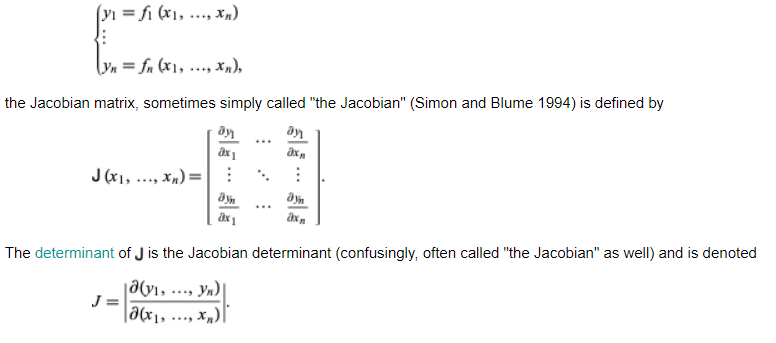

## Defining the Jacobian of a function (user argument)

In [12]:
henon

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      henon_eom
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.4, 0.3]

yu can see that the `jacobian` funciton of the equation of motion was computed automatically using the module `ForwardDiff`. you can also give a hard-coded jacobian as input to the `DiscreteDynamocalSystem`. Even though the automatic computation is very efficient, the best possible performance will come if you pass a "hard-coded" jacobian:

In [13]:
h_jacobain(x,p,t) = @SMatrix[-2*p[1]*x[1] 1.0; p[2] 0.0]

h_jacobain (generic function with 1 method)

In [14]:
henon_with_jac = DiscreteDynamicalSystem(henon_eom, state, p, h_jacobain)

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      henon_eom
 in-place?    false
 jacobian:    h_jacobain
 parameters:  [1.4, 0.3]

Even though `ForwardDiff` is truly performant, the hard-coded version should "always" be faster.
This becomes much more important for higher dimensional systems, especially for the in-place form!

# D. Identical Handling for Continuous and Discrete systems

Discrete systems aer evolved using internal algorithems. However , all time evolution of continuous systems is done through `DifferentialEquations.jl` library. 

See `DynamicalSystemsBase.CDS_KWAGS` for th default options used to solve continuous systems.

In [16]:
DynamicalSystemsBase.CDS_KWARGS

(alg = SimpleDiffEq.SimpleATsit5(), abstol = 1.0e-6, reltol = 1.0e-6)

* The process of creating a continuous system is identical to that of a discrete system, except that the constructor `ContinuousDynamicalSystem` is used instead

* In this case the function `eom` returns the time derivatives and not "next state"

* We will take teh oppertunity to show the process of using in-place equations of motion for a contunuous system, which is aimed at large systems. 

As an example we will use the continuous dynamical system [Hénon–Heiles system](https://en.wikipedia.org/wiki/H%C3%A9non%E2%80%93Heiles_system)

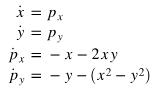

we will define function for in-place equations of motion 

In [17]:
# in-place form of equations of motion
# du is the derivatives vector, u is the state vector
function hheom!(du, u, p, t)
    du[1] = u[3]
    du[2] = u[4]
    du[3] = -u[1] -2*u[1]*u[2]
    du[4] = -u[2] -(u[1]^2 - u[2]^2)
    return nothing
end

hheom! (generic function with 1 method)

In [18]:
inital_state = [0, -0.25, 0.42081, 0]

4-element Array{Float64,1}:
  0.0
 -0.25
  0.42081
  0.0

In [19]:
# pass `nothing` as the parameters, because the Hénon–Heiles system doesn't have any
hhenon_heiles = ContinuousDynamicalSystem(hheom!,inital_state,nothing )

4-dimensional continuous dynamical system
 state:       [0.0, -0.25, 0.42081, 0.0]
 e.o.m.:      hheom!
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  nothing

now we can get a trajectory of this system, by solving using DifferentialEquations.jl

In [20]:
tr = trajectory(hhenon_heiles, 100.0, dt = 0.05)

4-dimensional Dataset{Float64} with 2001 points
  0.0        -0.25      0.42081   0.0
  0.0210361  -0.24961   0.420547  0.0156079
  0.0420459  -0.248441  0.419755  0.0311131
  0.0630027  -0.246502  0.418429  0.0464137
  0.0838797  -0.243805  0.416557  0.0614095
  0.104649   -0.240367  0.414125  0.0760025
  0.125283   -0.236213  0.411116  0.0900977
  0.145751   -0.231368  0.407508  0.103604
  0.166023   -0.225864  0.403277  0.116435
  0.186068   -0.219737  0.398396  0.128509
  0.205851   -0.213026  0.392838  0.139751
  0.22534    -0.205777  0.386572  0.150091
  0.244496   -0.198033  0.379568  0.159466
  ⋮                               
 -0.116577   -0.263     0.370759  0.157468
 -0.0979725  -0.254732  0.373344  0.17319
 -0.0792484  -0.245689  0.375555  0.188442
 -0.0604236  -0.235897  0.377364  0.20314
 -0.0415192  -0.225386  0.378735  0.217205
 -0.0225581  -0.214188  0.379631  0.230562
 -0.0035648  -0.202342  0.38001   0.243138
  0.0154336  -0.189889  0.379828  0.254868
  0.0344079  -0

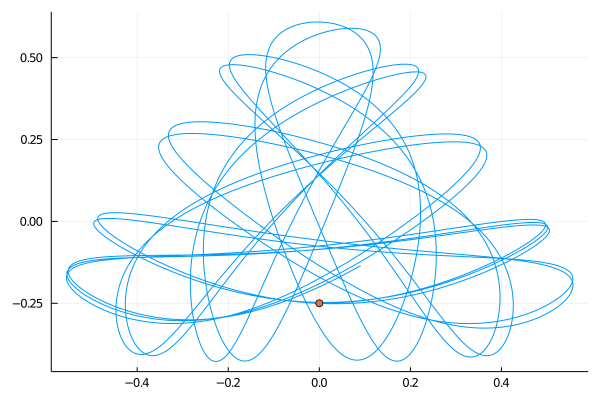

In [21]:
plot(tr[:, 1], tr[:, 2], leg=false)
scatter!([tr[1, 1]], [tr[1, 2]])